# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [2]:
# you are free to use any package you deem fit
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Dataset

In [37]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

# EDA

In [38]:
df = pd.DataFrame(X)
df.columns = ["X1", "X2"]
df["y"] = y

In [39]:
df.head()

,X1,X2,y
0,1.569404,-0.133388,1
1,0.496307,0.443235,1
2,1.783240,-0.230247,1
3,0.551058,-0.037493,1
4,0.257809,0.583334,1


In [40]:
df.describe()

,X1,X2,y
count,500.000000,500.000000,500.0000
mean,0.922681,-0.052607,0.9000
std,0.827420,0.472516,0.3003
min,-1.406585,-1.155438,0.0000
25%,0.276218,-0.400707,1.0000
50%,0.922614,-0.115386,1.0000
75%,1.638234,0.270453,1.0000
max,2.740572,1.222267,1.0000


<AxesSubplot:xlabel='X1', ylabel='X2'>

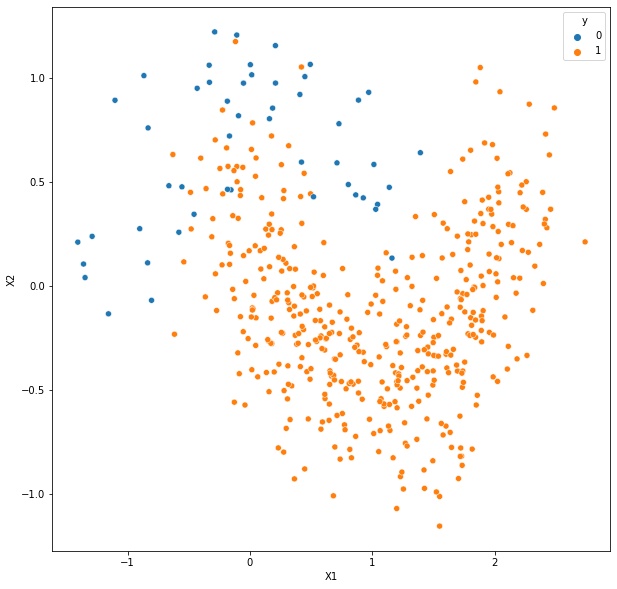

In [41]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="X1", y="X2", hue="y")

### Observations:
- We are dealing with imbalanced classes, might consider undersampling or oversampling
- 0 and 1 targets are mixed up in the region (X1 < 1 and X2 > 0), we will create a special label for this group
- We can add features like the distance from the origin, and the angle it makes with the origin

In [51]:
from sklearn.utils import resample
majority_class = df[df['y'] == 1]
minority_class = df[df['y'] == 0]
minority_class_count = len(minority_class)
majority_class_undersampled = resample(majority_class, replace=False,n_samples=minority_class_count,random_state=42)
df_og = df.copy()
df = pd.concat([majority_class_undersampled, minority_class])
df.reset_index(inplace=True)

Our new (undersampled) distribution:

<AxesSubplot:xlabel='X1', ylabel='X2'>

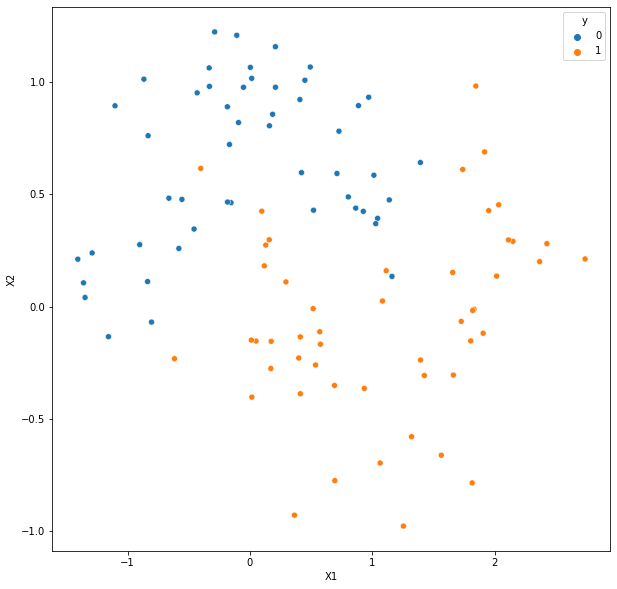

In [52]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="X1", y="X2", hue="y")

In [53]:
import math
df["r"] = np.sqrt(df["X1"]**2 + df["X2"] ** 2)
df["theta"] = np.arctan2(df["X2"], df["X1"])

<AxesSubplot:xlabel='theta', ylabel='Count'>

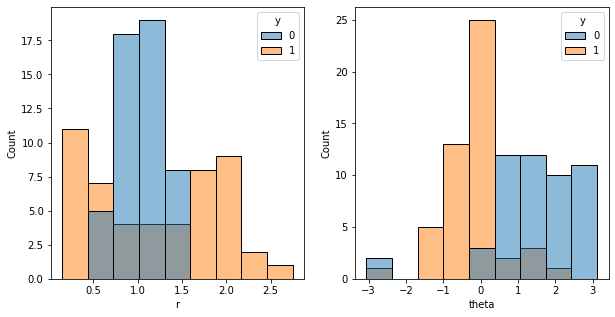

In [54]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=df, x="r", hue="y", ax=ax[0])
sns.histplot(data=df, x="theta", hue="y", ax=ax[1])

<AxesSubplot:xlabel='special', ylabel='count'>

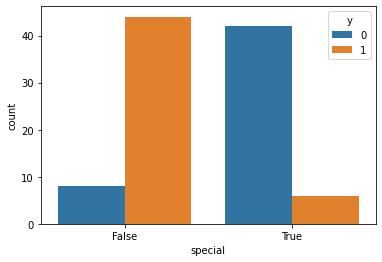

In [55]:
df["special"] = df.apply(lambda row : row["X1"] < 1 and row["X2"] > 0, axis=1)
plt.Figure(figsize=(10, 10))
sns.countplot(data=df, x="special", hue="y")

## Training

In [56]:
features = ["X1", "X2", "r", "theta", "special"]

Since y_true only contains one label, this prohibits the use of metrics like logloss or roc_auc. We will then use accuracy.

In [75]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from sklearn.metrics import accuracy_score

scores = []
models = []

kf = KFold(n_splits=5)
for i, (train_idx, test_idx) in enumerate(kf.split(df)):
    X_train = df.loc[train_idx, features]
    y_train = df.loc[train_idx, "y"]
    X_test = df.loc[test_idx, features]
    y_test = df.loc[test_idx, "y"]

    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))
    models.append(model)

print("scores:", scores)
print("average score:", np.mean(scores))

scores: [0.8, 0.9, 0.9, 0.9, 0.8]
average score: 0.86


## Performance Analysis

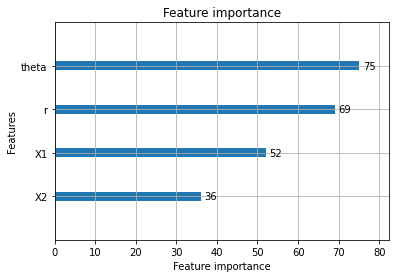

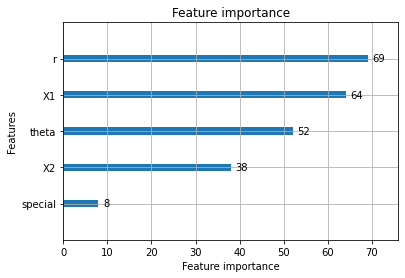

In [74]:
import random 
for model in random.sample(models, 2):
    lgbm.plot_importance(model)

Our model has accuracy 0.86 averaged across 5 folds.